In [6]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

### train数据探索

In [2]:
dpath = "./data/"
train = pd.read_csv(dpath+"train.csv")

In [3]:
train.head()

,user,event,invited,timestamp,interested,not_interested
0,3044012,1918771225,0,2012-10-02 15:53:05.754000+00:00,0,0
1,3044012,1502284248,0,2012-10-02 15:53:05.754000+00:00,0,0
2,3044012,2529072432,0,2012-10-02 15:53:05.754000+00:00,1,0
3,3044012,3072478280,0,2012-10-02 15:53:05.754000+00:00,0,0
4,3044012,1390707377,0,2012-10-02 15:53:05.754000+00:00,0,0


In [4]:
train.shape

(15398, 6)

In [10]:
train.apply(lambda x:sum(x.isnull()))

user              0
event             0
invited           0
timestamp         0
interested        0
not_interested    0
dtype: int64

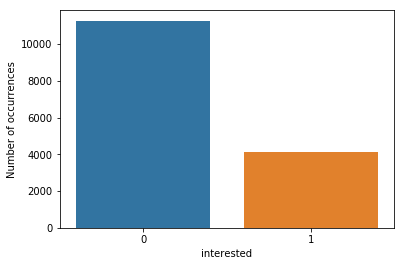

In [8]:
sns.countplot(train.interested);
plt.xlabel('interested');
plt.ylabel('Number of occurrences');

In [9]:
train.interested.value_counts()

0    11267
1     4131
Name: interested, dtype: int64

### test数据探索

In [14]:
test = pd.read_csv(dpath+"test.csv")

In [15]:
test.head()

,user,event,invited,timestamp
0,1776192,2877501688,0,2012-11-30 11:39:01.230000+00:00
1,1776192,3025444328,0,2012-11-30 11:39:01.230000+00:00
2,1776192,4078218285,0,2012-11-30 11:39:01.230000+00:00
3,1776192,1024025121,0,2012-11-30 11:39:01.230000+00:00
4,1776192,2972428928,0,2012-11-30 11:39:21.985000+00:00


In [16]:
test.shape

(10237, 4)

In [17]:
test.apply(lambda x:sum(x.isnull()))

user         0
event        0
invited      0
timestamp    0
dtype: int64

users

In [18]:
dpath = "./data/"
users = pd.read_csv(dpath+"users.csv")

In [19]:
users.head()

,user_id,locale,birthyear,gender,joinedAt,location,timezone
0,3197468391,id_ID,1993,male,2012-10-02T06:40:55.524Z,Medan Indonesia,480.0
1,3537982273,id_ID,1992,male,2012-09-29T18:03:12.111Z,Medan Indonesia,420.0
2,823183725,en_US,1975,male,2012-10-06T03:14:07.149Z,Stratford Ontario,-240.0
3,1872223848,en_US,1991,female,2012-11-04T08:59:43.783Z,Tehran Iran,210.0
4,3429017717,id_ID,1995,female,2012-09-10T16:06:53.132Z,NaN,420.0


In [20]:
users.shape

(38209, 7)

In [21]:
users.apply(lambda x:sum(x.isnull()))

user_id         0
locale          0
birthyear       0
gender        109
joinedAt       57
location     5464
timezone      436
dtype: int64

In [22]:
users['locale'].value_counts()

en_US    17073
id_ID    11817
es_LA     1999
en_GB     1745
es_ES      981
fa_IR      676
ar_AR      584
hu_HU      544
fr_FR      529
pt_BR      472
ka_GE      407
zh_CN      183
ru_RU      135
ja_JP      121
de_DE      119
tr_TR      109
ko_KR       91
it_IT       78
vi_VN       61
fr_CA       49
zh_TW       41
pt_PT       36
th_TH       27
km_KH       25
pl_PL       24
jv_ID       23
sv_SE       22
cs_CZ       22
zh_HK       19
el_GR       19
         ...  
bg_BG       11
hr_HR       11
nl_NL       10
he_IL        9
sk_SK        7
sr_RS        6
en_IN        5
ca_ES        4
mk_MK        4
bn_IN        4
da_DK        4
fi_FI        4
nb_NO        4
mn_MN        3
bs_BA        3
ku_TR        2
fb_LT        2
af_ZA        2
az_AZ        2
en_UD        2
lv_LV        2
lt_LT        2
uk_UA        2
pa_IN        1
eo_EO        1
tl_PH        1
et_EE        1
cy_GB        1
es_MX        1
hi_IN        1
Name: locale, Length: 64, dtype: int64

In [23]:
users['location'].value_counts()

Medan  Indonesia                         4509
Yogyakarta                               3092
Phnom Penh                               2169
Los Angeles  California                  1555
                                         1475
Santo Domingo  Dominican Republic        1442
Toronto  Ontario                          696
Phnom Penh  11                            631
Tbilisi  Georgia                          540
Phnom Pen  Phnum Penh  Cambodia           471
San Francisco  California                 434
Jogjakarta  Indonesia                     418
Djokja  Yogyakarta  Indonesia             398
Jakarta  Indonesia                        394
Jakarta  04                               293
Los Angeles  CA                           220
Bekasi                                    211
Medan  26                                 211
Torrance  CA                              193
undefined  undefined                      191
Bandung  Indonesia                        179
Miskolc  Hungary                  

user_friends

In [6]:
user_friends = pd.read_csv(dpath+"user_friends.csv")

In [7]:
user_friends.head()

,user,friends
0,3197468391,1346449342 3873244116 4226080662 1222907620 54...
1,3537982273,1491560444 395798035 2036380346 899375619 3534...
2,823183725,1484954627 1950387873 1652977611 4185960823 42...
3,1872223848,83361640 723814682 557944478 1724049724 253059...
4,3429017717,4253303705 2130310957 1838389374 3928735761 71...


### events

In [24]:
events= pd.read_csv(dpath+"events.csv")

In [25]:
events.head()

,event_id,user_id,start_time,city,state,zip,country,lat,lng,c_1,...,c_92,c_93,c_94,c_95,c_96,c_97,c_98,c_99,c_100,c_other
0,684921758,3647864012,2012-10-31T00:00:00.001Z,NaN,NaN,NaN,NaN,NaN,NaN,2,...,0,1,0,0,0,0,0,0,0,9
1,244999119,3476440521,2012-11-03T00:00:00.001Z,NaN,NaN,NaN,NaN,NaN,NaN,2,...,0,0,0,0,0,0,0,0,0,7
2,3928440935,517514445,2012-11-05T00:00:00.001Z,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,12
3,2582345152,781585781,2012-10-30T00:00:00.001Z,NaN,NaN,NaN,NaN,NaN,NaN,1,...,0,0,0,0,0,0,0,0,0,8
4,1051165850,1016098580,2012-09-27T00:00:00.001Z,NaN,NaN,NaN,NaN,NaN,NaN,1,...,0,0,0,0,0,0,0,0,0,9


In [27]:
events.shape

(3137972, 110)

In [26]:
events.apply(lambda x:sum(x.isnull()))

event_id            0
user_id             0
start_time          0
city          1557124
state         1889723
zip           2686279
country       1533009
lat           1331880
lng           1331880
c_1                 0
c_2                 0
c_3                 0
c_4                 0
c_5                 0
c_6                 0
c_7                 0
c_8                 0
c_9                 0
c_10                0
c_11                0
c_12                0
c_13                0
c_14                0
c_15                0
c_16                0
c_17                0
c_18                0
c_19                0
c_20                0
c_21                0
               ...   
c_72                0
c_73                0
c_74                0
c_75                0
c_76                0
c_77                0
c_78                0
c_79                0
c_80                0
c_81                0
c_82                0
c_83                0
c_84                0
c_85                0
c_86      

In [29]:
len(events['city'].unique())

31648

In [30]:
len(events['state'].unique())

903

In [31]:
len(events['zip'].unique())

77170

In [32]:
len(events['country'].unique())

208

In [33]:
len(events['lat'].unique())

63083

In [34]:
len(events['lng'].unique())

112393

### event_attendees

In [10]:
event_attendees = pd.read_csv(dpath+"event_attendees.csv")

In [11]:
event_attendees.head()

,event,yes,maybe,invited,no
0,1159822043,1975964455 252302513 4226086795 3805886383 142...,2733420590 517546982 1350834692 532087573 5831...,1723091036 3795873583 4109144917 3560622906 31...,3575574655 1077296663
1,686467261,2394228942 2686116898 1056558062 3792942231 41...,1498184352 645689144 3770076778 331335845 4239...,1788073374 733302094 1830571649 676508092 7081...,NaN
2,1186208412,NaN,3320380166 3810793697,1379121209 440668682,1728988561 2950720854
3,2621578336,NaN,NaN,NaN,NaN
4,855842686,2406118796 3550897984 294255260 1125817077 109...,2671721559 1761448345 2356975806 2666669465 10...,1518670705 880919237 2326414227 2673818347 332...,3500235232
